# Transfer learning - Survival prediction
Use best epoch and all dataset for training

In [1]:
import os
os.environ["XLA_FLAGS"] = "--xla_gpu_cuda_data_dir=/home/shenwanxiang/anaconda3"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import tensorflow as tf
tf.test.is_gpu_available()

tf.config.run_functions_eagerly(True)

tf.__version__
import sys
sys.path.append('../../../codeocean/environment/clinical_transformer/')



2025-08-14 17:37:28.423112: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-14 17:37:28.482685: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-14 17:37:28.848741: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/shenwanxiang/anaconda3/lib:
2025-08-14 17:37:28.848775: W tensorflow/compiler/xla/stream_exe

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2025-08-14 17:37:29.278078: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-14 17:37:29.291175: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-08-14 17:37:29.310044: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-08-14 17:37:29.310126: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at

In [2]:
from xai.models import Trainer
from xai.models import SurvivalTransformer
from xai.models import OptimizedSurvivalDataGenerator as SurvivalDataGenerator
from xai.losses.survival import cIndex_SigmoidApprox as cindex_loss
from xai.metrics.survival import sigmoid_concordance as cindex_metric

In [3]:
import pandas as pd
from samecode.random import set_seed

## Dataset

In [4]:
data = pd.read_csv('./data/dataset-train.data.csv')
features = data.columns[-43:].tolist()
#features
data.shape

(562, 51)

## Parameters

In [5]:
max_features_percentile=100
test_size=0.0 # fraction of samples used for validation
repetitions=10 # number replicates (training / validation) random splits to evaluate variability.

mode='survival'
learning_rate=0.0001
epochs=88
verbose=1
seed=0
embedding_size = 128
num_heads = 2
num_layers = 8

In [6]:
! rm -r ./results/TransferLearningSurvival_all/

/bin/sh: /home/shenwanxiang/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/sh)
rm: cannot remove './results/TransferLearningSurvival_all/': No such file or directory


## Training

In [7]:
outdir = './results/TransferLearningSurvival_all/'

set_seed(0)

trainer = Trainer(
    from_pretrained='../FoundationModel/fold-0_id-0/model.E002000.h5',
    out_dir = outdir,
    max_features_percentile=max_features_percentile,
    test_size=test_size,
    mode=mode,
    model=SurvivalTransformer, 
    dataloader=SurvivalDataGenerator,
    loss=cindex_loss,
    metrics=[cindex_metric]
)

trainer.setup_data(
    data, 
    discrete_features = [],
    continuous_features = features,
    target=['time', 'event']
)

trainer.setup_model(
    learning_rate=learning_rate,
    embedding_size=embedding_size,
    num_heads=num_heads,
    num_layers=num_layers,
    batch_size_max=True,
    save_best_only=False
)

trainer.fit(repetitions=repetitions, epochs=epochs, verbose=verbose, seed=seed)

/home/shenwanxiang/.local/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO	2025-08-14 17:37:30,943	Setting up working directory: ./results/TransferLearningSurvival_all/
INFO	2025-08-14 17:37:30,944	Setting up transfer learning directory: ./results/TransferLearningSurvival_all//model.E002000.h5/
2025-08-14 17:37:30.947170: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-08-14 17:37:30.947334: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-08-14 17:37:30.947393: I tensorflow/compiler

Epoch 1/88


/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


WARNING	2025-08-14 17:37:32,531	AutoGraph could not transform <function cIndex_SigmoidApprox at 0x7fa2d873c5f0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


WARNING	2025-08-14 17:37:32,776	AutoGraph could not transform <function sigmoid_concordance at 0x7fa247417170> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 1s 555ms/step - loss: 0.4892 - sigmoid_concordance: 0.5165 - val_loss: 0.5015 - val_sigmoid_concordance: 0.5938
Epoch 2/88
1/1 [==============================] - 0s 299ms/step - loss: 0.4815 - sigmoid_concordance: 0.5318 - val_loss: 0.4597 - val_sigmoid_concordance: 0.6562
Epoch 3/88
1/1 [==============================] - 0s 304ms/step - loss: 0.4521 - sigmoid_concordance: 0.5716 - val_loss: 0.4173 - val_sigmoid_concordance: 0.7500
Epoch 4/88
1/1 [==============================] - 0s 297ms/step - loss: 0.4499 - sigmoid_concordance: 0.5699 - val_loss: 0.3748 - val_sigmoid_concordance: 0.7500
Epoch 5/88
1/1 [==============================] - 0s 297ms/s

INFO	2025-08-14 17:38:00,153	RUN ID: fold-1_id-1
INFO	2025-08-14 17:38:00,153	RUN ID out directory: ./results/TransferLearningSurvival_all//model.E002000.h5//fold-1_id-1/
INFO	2025-08-14 17:38:00,207	Training samples: 562
INFO	2025-08-14 17:38:00,207	Testing samples: 10
INFO	2025-08-14 17:38:00,207	Number of features at 100th percentile: 43 that are non nans


Epoch 1/88
1/1 [==============================] - 0s 470ms/step - loss: 0.5003 - sigmoid_concordance: 0.5020 - val_loss: 0.4507 - val_sigmoid_concordance: 0.6875
Epoch 2/88
1/1 [==============================] - 0s 319ms/step - loss: 0.4691 - sigmoid_concordance: 0.5541 - val_loss: 0.4183 - val_sigmoid_concordance: 0.6875
Epoch 3/88
1/1 [==============================] - 0s 311ms/step - loss: 0.4567 - sigmoid_concordance: 0.5711 - val_loss: 0.3873 - val_sigmoid_concordance: 0.7188
Epoch 4/88
1/1 [==============================] - 0s 298ms/step - loss: 0.4432 - sigmoid_concordance: 0.5835 - val_loss: 0.3607 - val_sigmoid_concordance: 0.7188
Epoch 5/88
1/1 [==============================] - 0s 298ms/step - loss: 0.4388 - sigmoid_concordance: 0.5834 - val_loss: 0.3330 - val_sigmoid_concordance: 0.7188
Epoch 6/88
1/1 [==============================] - 0s 300ms/step - loss: 0.4148 - sigmoid_concordance: 0.6098 - val_loss: 0.3090 - val_sigmoid_concordance: 0.7188
Epoch 7/88
1/1 [============

INFO	2025-08-14 17:38:27,875	RUN ID: fold-2_id-2
INFO	2025-08-14 17:38:27,876	RUN ID out directory: ./results/TransferLearningSurvival_all//model.E002000.h5//fold-2_id-2/
INFO	2025-08-14 17:38:27,929	Training samples: 562
INFO	2025-08-14 17:38:27,929	Testing samples: 10
INFO	2025-08-14 17:38:27,930	Number of features at 100th percentile: 43 that are non nans


Epoch 1/88
1/1 [==============================] - 0s 462ms/step - loss: 0.4811 - sigmoid_concordance: 0.5356 - val_loss: 0.4325 - val_sigmoid_concordance: 0.6562
Epoch 2/88
1/1 [==============================] - 0s 309ms/step - loss: 0.4533 - sigmoid_concordance: 0.5795 - val_loss: 0.4094 - val_sigmoid_concordance: 0.6562
Epoch 3/88
1/1 [==============================] - 0s 304ms/step - loss: 0.4410 - sigmoid_concordance: 0.5950 - val_loss: 0.3909 - val_sigmoid_concordance: 0.6875
Epoch 4/88
1/1 [==============================] - 0s 300ms/step - loss: 0.4234 - sigmoid_concordance: 0.6128 - val_loss: 0.3736 - val_sigmoid_concordance: 0.6875
Epoch 5/88
1/1 [==============================] - 0s 306ms/step - loss: 0.4253 - sigmoid_concordance: 0.6004 - val_loss: 0.3587 - val_sigmoid_concordance: 0.6875
Epoch 6/88
1/1 [==============================] - 0s 303ms/step - loss: 0.4267 - sigmoid_concordance: 0.5955 - val_loss: 0.3457 - val_sigmoid_concordance: 0.6875
Epoch 7/88
1/1 [============

INFO	2025-08-14 17:38:55,471	RUN ID: fold-3_id-3
INFO	2025-08-14 17:38:55,471	RUN ID out directory: ./results/TransferLearningSurvival_all//model.E002000.h5//fold-3_id-3/
INFO	2025-08-14 17:38:55,525	Training samples: 562
INFO	2025-08-14 17:38:55,525	Testing samples: 10
INFO	2025-08-14 17:38:55,526	Number of features at 100th percentile: 43 that are non nans


Epoch 1/88
1/1 [==============================] - 0s 459ms/step - loss: 0.4890 - sigmoid_concordance: 0.5179 - val_loss: 0.4356 - val_sigmoid_concordance: 0.7500
Epoch 2/88
1/1 [==============================] - 0s 301ms/step - loss: 0.4700 - sigmoid_concordance: 0.5403 - val_loss: 0.3980 - val_sigmoid_concordance: 0.7812
Epoch 3/88
1/1 [==============================] - 0s 296ms/step - loss: 0.4519 - sigmoid_concordance: 0.5700 - val_loss: 0.3601 - val_sigmoid_concordance: 0.7812
Epoch 4/88
1/1 [==============================] - 0s 322ms/step - loss: 0.4255 - sigmoid_concordance: 0.6009 - val_loss: 0.3243 - val_sigmoid_concordance: 0.7812
Epoch 5/88
1/1 [==============================] - 0s 298ms/step - loss: 0.4159 - sigmoid_concordance: 0.6095 - val_loss: 0.2931 - val_sigmoid_concordance: 0.7812
Epoch 6/88
1/1 [==============================] - 0s 305ms/step - loss: 0.4295 - sigmoid_concordance: 0.5839 - val_loss: 0.2684 - val_sigmoid_concordance: 0.7812
Epoch 7/88
1/1 [============

INFO	2025-08-14 17:39:22,960	RUN ID: fold-4_id-4
INFO	2025-08-14 17:39:22,960	RUN ID out directory: ./results/TransferLearningSurvival_all//model.E002000.h5//fold-4_id-4/
INFO	2025-08-14 17:39:23,014	Training samples: 562
INFO	2025-08-14 17:39:23,014	Testing samples: 10
INFO	2025-08-14 17:39:23,015	Number of features at 100th percentile: 43 that are non nans


Epoch 1/88
1/1 [==============================] - 0s 467ms/step - loss: 0.5151 - sigmoid_concordance: 0.4782 - val_loss: 0.5440 - val_sigmoid_concordance: 0.2500
Epoch 2/88
1/1 [==============================] - 0s 302ms/step - loss: 0.4900 - sigmoid_concordance: 0.5199 - val_loss: 0.5098 - val_sigmoid_concordance: 0.4688
Epoch 3/88
1/1 [==============================] - 0s 300ms/step - loss: 0.4827 - sigmoid_concordance: 0.5213 - val_loss: 0.4685 - val_sigmoid_concordance: 0.5625
Epoch 4/88
1/1 [==============================] - 0s 299ms/step - loss: 0.4611 - sigmoid_concordance: 0.5567 - val_loss: 0.4213 - val_sigmoid_concordance: 0.6250
Epoch 5/88
1/1 [==============================] - 0s 301ms/step - loss: 0.4356 - sigmoid_concordance: 0.5882 - val_loss: 0.3746 - val_sigmoid_concordance: 0.6562
Epoch 6/88
1/1 [==============================] - 0s 306ms/step - loss: 0.4253 - sigmoid_concordance: 0.5942 - val_loss: 0.3443 - val_sigmoid_concordance: 0.6562
Epoch 7/88
1/1 [============

INFO	2025-08-14 17:39:50,452	RUN ID: fold-5_id-5
INFO	2025-08-14 17:39:50,453	RUN ID out directory: ./results/TransferLearningSurvival_all//model.E002000.h5//fold-5_id-5/
INFO	2025-08-14 17:39:50,507	Training samples: 562
INFO	2025-08-14 17:39:50,507	Testing samples: 10
INFO	2025-08-14 17:39:50,507	Number of features at 100th percentile: 43 that are non nans


Epoch 1/88
1/1 [==============================] - 0s 463ms/step - loss: 0.4792 - sigmoid_concordance: 0.5289 - val_loss: 0.4872 - val_sigmoid_concordance: 0.5000
Epoch 2/88
1/1 [==============================] - 0s 311ms/step - loss: 0.4745 - sigmoid_concordance: 0.5383 - val_loss: 0.4594 - val_sigmoid_concordance: 0.5938
Epoch 3/88
1/1 [==============================] - 0s 300ms/step - loss: 0.4642 - sigmoid_concordance: 0.5488 - val_loss: 0.4074 - val_sigmoid_concordance: 0.6562
Epoch 4/88
1/1 [==============================] - 0s 303ms/step - loss: 0.4471 - sigmoid_concordance: 0.5659 - val_loss: 0.3668 - val_sigmoid_concordance: 0.6875
Epoch 5/88
1/1 [==============================] - 0s 300ms/step - loss: 0.4368 - sigmoid_concordance: 0.5752 - val_loss: 0.3513 - val_sigmoid_concordance: 0.7188
Epoch 6/88
1/1 [==============================] - 0s 297ms/step - loss: 0.4322 - sigmoid_concordance: 0.5784 - val_loss: 0.3433 - val_sigmoid_concordance: 0.6875
Epoch 7/88
1/1 [============

INFO	2025-08-14 17:40:18,101	RUN ID: fold-6_id-6
INFO	2025-08-14 17:40:18,101	RUN ID out directory: ./results/TransferLearningSurvival_all//model.E002000.h5//fold-6_id-6/
INFO	2025-08-14 17:40:18,155	Training samples: 562
INFO	2025-08-14 17:40:18,156	Testing samples: 10
INFO	2025-08-14 17:40:18,156	Number of features at 100th percentile: 43 that are non nans


Epoch 1/88
1/1 [==============================] - 0s 470ms/step - loss: 0.5185 - sigmoid_concordance: 0.4719 - val_loss: 0.4839 - val_sigmoid_concordance: 0.5938
Epoch 2/88
1/1 [==============================] - 0s 301ms/step - loss: 0.4797 - sigmoid_concordance: 0.5311 - val_loss: 0.4499 - val_sigmoid_concordance: 0.6562
Epoch 3/88
1/1 [==============================] - 0s 300ms/step - loss: 0.4706 - sigmoid_concordance: 0.5419 - val_loss: 0.4069 - val_sigmoid_concordance: 0.6562
Epoch 4/88
1/1 [==============================] - 0s 301ms/step - loss: 0.4276 - sigmoid_concordance: 0.6009 - val_loss: 0.3612 - val_sigmoid_concordance: 0.6875
Epoch 5/88
1/1 [==============================] - 0s 298ms/step - loss: 0.4254 - sigmoid_concordance: 0.5960 - val_loss: 0.3279 - val_sigmoid_concordance: 0.6875
Epoch 6/88
1/1 [==============================] - 0s 312ms/step - loss: 0.4170 - sigmoid_concordance: 0.6006 - val_loss: 0.3122 - val_sigmoid_concordance: 0.6875
Epoch 7/88
1/1 [============

INFO	2025-08-14 17:40:45,793	RUN ID: fold-7_id-7
INFO	2025-08-14 17:40:45,793	RUN ID out directory: ./results/TransferLearningSurvival_all//model.E002000.h5//fold-7_id-7/
INFO	2025-08-14 17:40:45,847	Training samples: 562
INFO	2025-08-14 17:40:45,847	Testing samples: 10
INFO	2025-08-14 17:40:45,848	Number of features at 100th percentile: 43 that are non nans


Epoch 1/88
1/1 [==============================] - 0s 458ms/step - loss: 0.5147 - sigmoid_concordance: 0.4738 - val_loss: 0.4395 - val_sigmoid_concordance: 0.7500
Epoch 2/88
1/1 [==============================] - 0s 298ms/step - loss: 0.4820 - sigmoid_concordance: 0.5318 - val_loss: 0.4085 - val_sigmoid_concordance: 0.7812
Epoch 3/88
1/1 [==============================] - 0s 300ms/step - loss: 0.4667 - sigmoid_concordance: 0.5556 - val_loss: 0.3825 - val_sigmoid_concordance: 0.7500
Epoch 4/88
1/1 [==============================] - 0s 302ms/step - loss: 0.4563 - sigmoid_concordance: 0.5703 - val_loss: 0.3563 - val_sigmoid_concordance: 0.7500
Epoch 5/88
1/1 [==============================] - 0s 310ms/step - loss: 0.4288 - sigmoid_concordance: 0.6017 - val_loss: 0.3327 - val_sigmoid_concordance: 0.7500
Epoch 6/88
1/1 [==============================] - 0s 305ms/step - loss: 0.4221 - sigmoid_concordance: 0.6027 - val_loss: 0.3149 - val_sigmoid_concordance: 0.7500
Epoch 7/88
1/1 [============

INFO	2025-08-14 17:41:13,379	RUN ID: fold-8_id-8
INFO	2025-08-14 17:41:13,380	RUN ID out directory: ./results/TransferLearningSurvival_all//model.E002000.h5//fold-8_id-8/
INFO	2025-08-14 17:41:13,434	Training samples: 562
INFO	2025-08-14 17:41:13,434	Testing samples: 10
INFO	2025-08-14 17:41:13,435	Number of features at 100th percentile: 43 that are non nans


Epoch 1/88
1/1 [==============================] - 0s 465ms/step - loss: 0.5105 - sigmoid_concordance: 0.4798 - val_loss: 0.4347 - val_sigmoid_concordance: 0.8125
Epoch 2/88
1/1 [==============================] - 0s 305ms/step - loss: 0.4910 - sigmoid_concordance: 0.5181 - val_loss: 0.4147 - val_sigmoid_concordance: 0.7812
Epoch 3/88
1/1 [==============================] - 0s 298ms/step - loss: 0.4784 - sigmoid_concordance: 0.5430 - val_loss: 0.3949 - val_sigmoid_concordance: 0.7188
Epoch 4/88
1/1 [==============================] - 0s 308ms/step - loss: 0.4536 - sigmoid_concordance: 0.5776 - val_loss: 0.3742 - val_sigmoid_concordance: 0.7500
Epoch 5/88
1/1 [==============================] - 0s 300ms/step - loss: 0.4440 - sigmoid_concordance: 0.5860 - val_loss: 0.3528 - val_sigmoid_concordance: 0.7500
Epoch 6/88
1/1 [==============================] - 0s 328ms/step - loss: 0.4374 - sigmoid_concordance: 0.5862 - val_loss: 0.3341 - val_sigmoid_concordance: 0.7500
Epoch 7/88
1/1 [============

INFO	2025-08-14 17:41:40,999	RUN ID: fold-9_id-9
INFO	2025-08-14 17:41:40,999	RUN ID out directory: ./results/TransferLearningSurvival_all//model.E002000.h5//fold-9_id-9/
INFO	2025-08-14 17:41:41,144	Training samples: 562
INFO	2025-08-14 17:41:41,145	Testing samples: 10
INFO	2025-08-14 17:41:41,145	Number of features at 100th percentile: 43 that are non nans


Epoch 1/88
1/1 [==============================] - 0s 467ms/step - loss: 0.5141 - sigmoid_concordance: 0.4743 - val_loss: 0.4729 - val_sigmoid_concordance: 0.7500
Epoch 2/88
1/1 [==============================] - 0s 303ms/step - loss: 0.4914 - sigmoid_concordance: 0.5210 - val_loss: 0.4445 - val_sigmoid_concordance: 0.6875
Epoch 3/88
1/1 [==============================] - 0s 300ms/step - loss: 0.4626 - sigmoid_concordance: 0.5750 - val_loss: 0.4140 - val_sigmoid_concordance: 0.7812
Epoch 4/88
1/1 [==============================] - 0s 301ms/step - loss: 0.4592 - sigmoid_concordance: 0.5672 - val_loss: 0.3838 - val_sigmoid_concordance: 0.7812
Epoch 5/88
1/1 [==============================] - 0s 302ms/step - loss: 0.4575 - sigmoid_concordance: 0.5699 - val_loss: 0.3541 - val_sigmoid_concordance: 0.7812
Epoch 6/88
1/1 [==============================] - 0s 301ms/step - loss: 0.4366 - sigmoid_concordance: 0.5980 - val_loss: 0.3263 - val_sigmoid_concordance: 0.8125
Epoch 7/88
1/1 [============

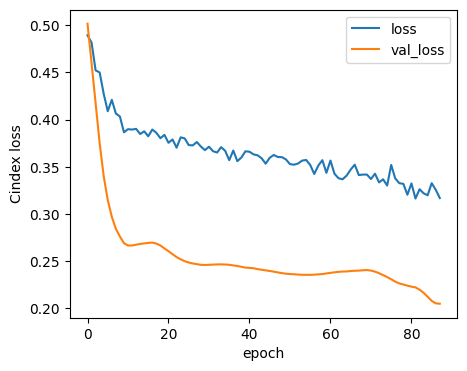

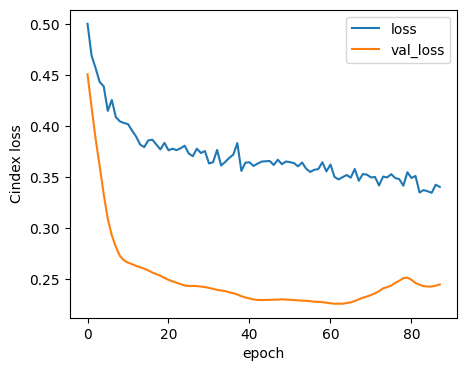

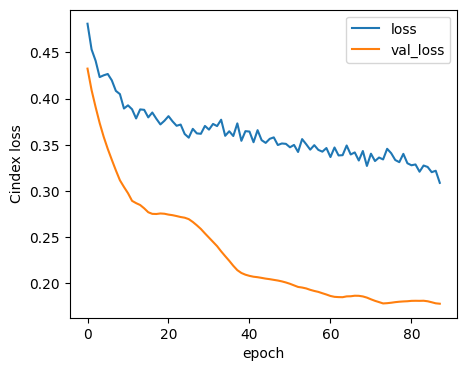

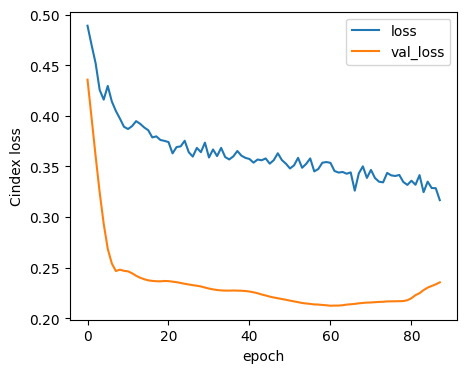

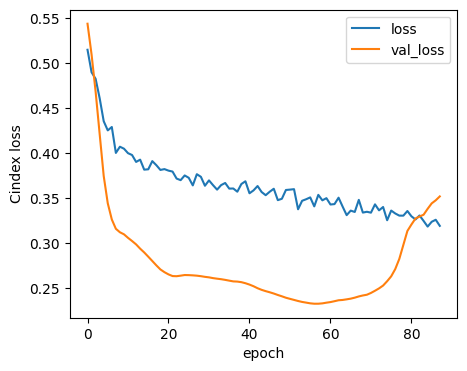

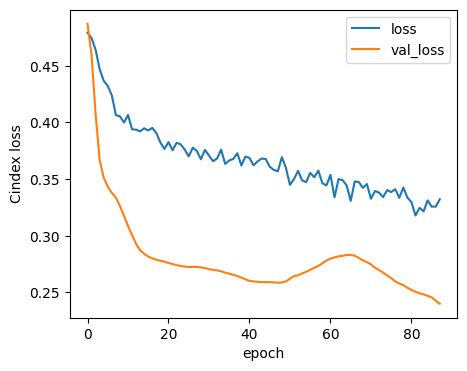

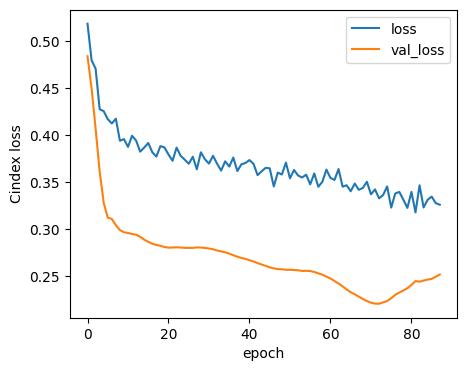

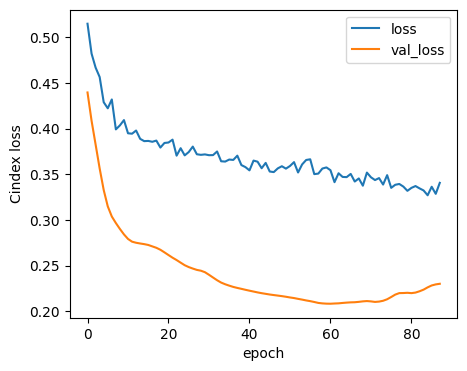

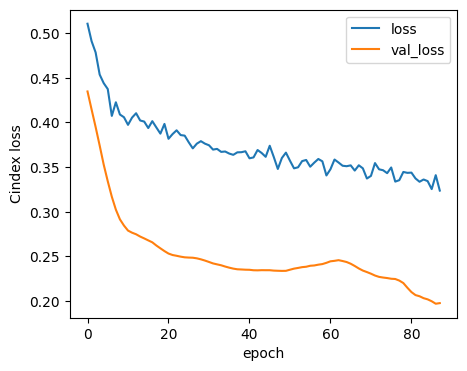

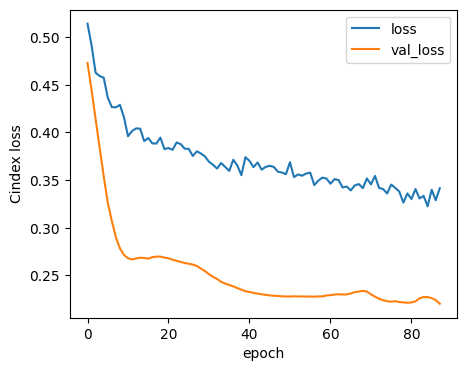

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
best_es = []
for i in range(repetitions):
    dfh = pd.read_csv("./results/TransferLearningSurvival_all/model.E002000.h5/fold-%s_id-%s/history.csv" % (i,i), index_col=0)
    fig, ax=plt.subplots(figsize=(5,4))
    dfh[['loss', 'val_loss']].plot(ax=ax)
    ax.set_ylabel('Cindex loss')
    
    best_e1 = dfh.val_loss.idxmin()
    best_e2 = dfh.val_sigmoid_concordance.idxmax()
    best_es.append(best_e1)
    #best_es.append(best_e2)
    
best_epoch = pd.DataFrame(best_es)[0].median()